In [137]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

n=500 #Número de registros que tenemos en nuestros datos
p=2 #Cuantas caracteristicas tiene cada uno de los registros de nuestros datos

X,Y =make_circles(n_samples=n,factor=0.5,noise=0.05)
    #X son las inputs y Y las outputs
Y=Y[:,np.newaxis]


In [138]:
print(f'X: {X.shape}\nY: {Y.shape}\n')

X: (500, 2)
Y: (500, 1)



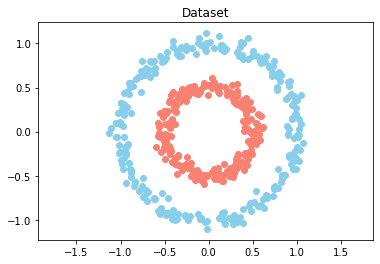

In [139]:
plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c="skyblue")
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon")
plt.axis("equal")
plt.title("Dataset")
plt.show()

In [140]:
class NeuralNetwork:
    
    def __init__(self,topology):
        self.sigmoid = (lambda x: 1/(1+np.e**(-x)), lambda x: x*(1-x))
            #Función sigmoide y su derivada
        self.act_function=self.sigmoid
            #Asignación a la función sigmoide como función de activación
        self.topology=topology
            #Lectura del valor de tipologia deseado
        self.nn=[]
            #Donde se guardará la red neuronal, con sus pesos y sus bias.
        self.cost= (lambda Yp, Yr:np.mean((Yp-Yr)**2), lambda Yp,Yr: (Yp-Yr))
            #Función de coste, que corresponde al error cuadrático medio y su derivada
        self.lr=0.05
            #Learning rate
        self.create()
            #Ejecuta el método para crear la red
      
    
    def neuralLayer(self,n_conexion,n_neuron):
        #Método que crea cada capa
        
        self.bias = np.random.rand(1, n_neuron)*2-1
            #Valor aleatorio de bias para cada neurona
        self.weight = np.random.rand(n_conexion, n_neuron)*2-1
            #Valor aleatorio de pesos para cada neurona y sus conexiones
        return [self.bias,self.weight]
            #retorna un vector con la capa creada
        
    
    def plotSigmoid(self):
        _x=np.linspace(-7,7,100)
        plt.plot(_x,self.sigmoid[0](_x))
        plt.show()
            #Gráfica de la función sigmoide
        
        
    def create(self):
        #Método que crea la red neuronal
        
        for l,layer in enumerate(self.topology[:-1]):
            #Toma los datos de la tipología ingresado
        
            self.nn.append(self.neuralLayer(self.topology[l],self.topology[l+1]))
                #Va creando las capas según el valor que corresponda al ingresado en la tipologia
    
    def training(self,X,Y,train):
        #Método que ejecuta el forward, backward y gradient descent
        
        out=[(None,X)]
        
        for l,layer in enumerate(self.nn):
            #Para cada una de las capas de la red
            z= out[-1][1] @ self.nn[l][1] + self.nn[l][0]
                #Ejecución de la suma ponderada
            a=self.act_function[0](z)
                #Aplicación de la función de activación
            out.append((z,a))
                #almacenamiento
    
        if train:

            deltas = []
            for l in reversed(range(0,len(self.nn))):
                z=out[l+1][0]
                    #Tomamos nuevamente los valores de la suma ponderada
                a=out[l+1][1]
                    #Valores de la función de activación

                if l==len(self.nn) -1:
                    deltas.insert(0,self.cost[1](a,Y)*self.act_function[1](a))
                        #Derivada del error cuadrático medio aplicado a la función de activación y el valor esperado
                            #Multiplicado por la derivada de la función de activación aplicada al valor de la función de activación
                        #Referencia: 1. Computo del error de la última capa
                else:
                    deltas.insert(0,deltas[0] @ _w.T *self.act_function[1](a))
                        #Referencia: 2. Retropropagamos el error a la capa anterior
                    

                _w=self.nn[l][1]
                    #Pesos de la red

        #gradient descent
            #Hacer uso de las deltas calculadas en el back propagation para optimizar los parametros de la red
                self.nn[l][0] = self.nn[l][0] -np.mean(deltas[0], axis=0, keepdims=True)*self.lr
                    #Descenso del gradiente para el parámetro de bias
                        #Tomamos la media del error, lo multiplicamos por el learning rate y eso se le resta al valor actual de bias
                        
                self.nn[l][1] = self.nn[l][1] -out[l][1].T @ deltas[0]*self.lr
                    ##Descenso del gradiente para el parámetro de pesos
            
        return out[-1][1]
        
        

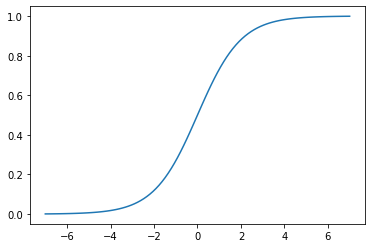

In [141]:
classifier=NeuralNetwork([p,4,8,1])
classifier.plotSigmoid()

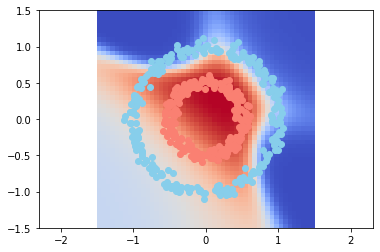

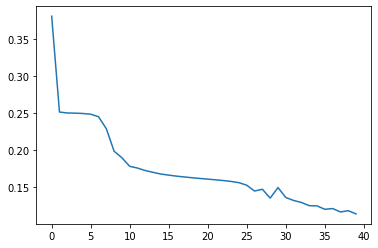

In [143]:
import time
from IPython.display import clear_output

classifier=NeuralNetwork([p,4,8,1])

loss=[]

for i in range(1000):
    
    #Entrenamos la red
    
    pY=classifier.training(X,Y,True)
    
    if i % 25 == 0:
        
        loss.append(classifier.cost[0](pY,Y))
        
        res = 50
        
        _x0 = np.linspace(-1.5,1.5,res)
        _x1 = np.linspace(-1.5,1.5,res)
        
        _Y=np.zeros((res,res))
        
        for i0,x0 in enumerate(_x0):
            for i1,x1 in enumerate(_x1):
                _Y[i0,i1]=classifier.training(np.array([[x0,x1]]),Y,False)[0][0]
                
        plt.pcolormesh(_x0,_x1,_Y,cmap="coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c="skyblue")
        plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon")
        
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)),loss)
        plt.show()
        time.sleep(0.5)